# Real World Image Classification with Intel Image Classification Dataset

In this notebook, I will use the Intel Image Classification dataset to classify images into 6 different classes. The dataset contains 14,034 images of size 150x150 pixels. The classes are: buildings, forest, glacier, mountain, sea, and street. The dataset is available on [Kaggle](https://www.kaggle.com/puneet6060/intel-image-classification).

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Load the data
current_dir = os.getcwd()
TRAINING_DIR = os.path.join(current_dir, 'archive/seg_train/seg_train')
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = os.path.join(current_dir, 'archive/seg_test/seg_test')
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=16,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [19]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Add a callback to stop training when the accuracy is 95%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [21]:
# Train the model
history = model.fit(train_generator, epochs=15, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 127s 142ms/step - accuracy: 0.5558 - loss: 1.1277 - val_accuracy: 0.7447 - val_loss: 0.6944
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 127s 144ms/step - accuracy: 0.7608 - loss: 0.6559 - val_accuracy: 0.7650 - val_loss: 0.6710
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 124s 141ms/step - accuracy: 0.8076 - loss: 0.5283 - val_accuracy: 0.7740 - val_loss: 0.6221
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 123s 140ms/step - accuracy: 0.8389 - loss: 0.4272 - val_accuracy: 0.8060 - val_loss: 0.5397
Epoch 5/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 137s 156ms/step - accuracy: 0.8730 - loss: 0.3602 - val_accuracy: 0.8020 - val_loss: 0.5883
Epoch 6/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 125s 142ms/step - accuracy: 0.8935 - loss: 0.2970 - val_accuracy: 0.7657 - val_loss: 0.6805
Epoch 7/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 130s 148ms/step - accuracy: 0.9132 - loss: 0.2359 - val_accuracy: 0.8093 - val_loss: 0.6224
Epoch 8/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 126s 143ms/step - accuracy: 0.9308 -

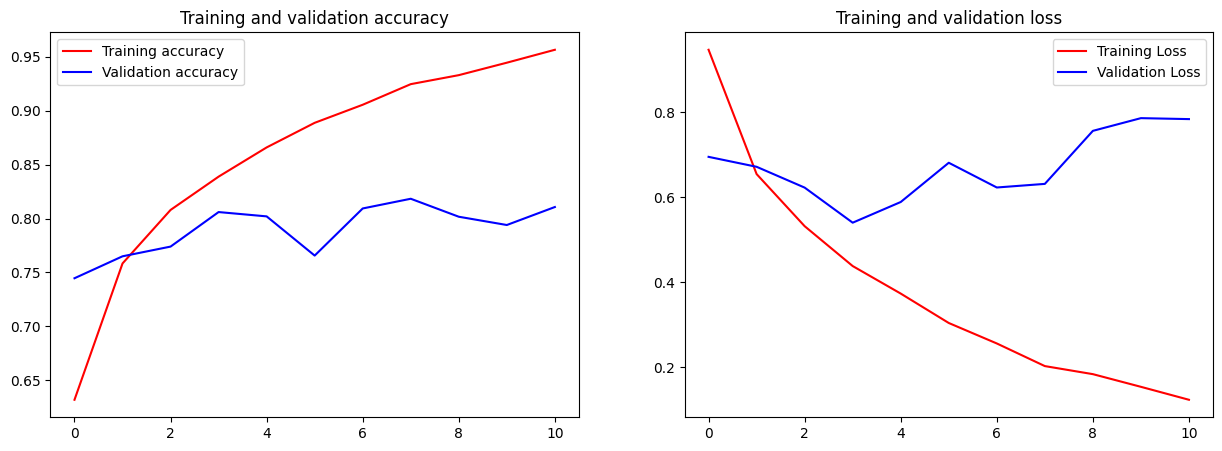

In [22]:
# Plot the accuracy and loss as subplots
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


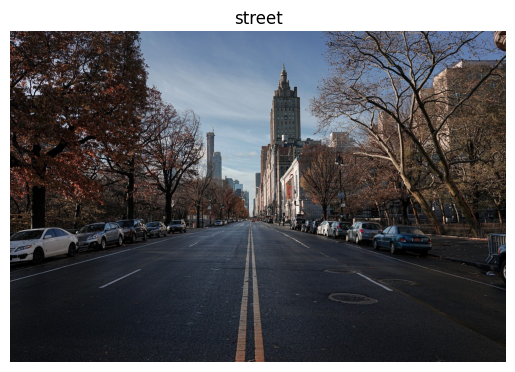

In [24]:
# Allow the user to input an image to classify using directory path

# Load the image
image_path = input('Enter the path to the image you want to classify: ') 
original_img = mpimg.imread(image_path)

image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
input_arr = input_arr / 255.0

# Display the image
predictions = model.predict(input_arr)
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
plt.axis('off')
plt.title(classes[np.argmax(predictions)])
plt.axis('off')
plt.imshow(original_img)
